In [50]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [51]:
type(data)


dict

In [52]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [53]:
#df.shape

In [54]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12474,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19948812.00000,19948812.00000,False,NaN,1,NaN,NaN,None,2025-11-16T14:40:00.000Z,95468.43666,49907551887.86011,-35.13950,0.20988,-0.81565,-7.57063,-8.79815,-17.45385,-17.15445,1904481894897.03613,58.88550,2004837169894.52002,None,2025-11-16T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:43:03.841826
1,1027,Ethereum,ETH,ethereum,11156,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120696239.39391,120696239.39391,True,NaN,2,NaN,NaN,None,2025-11-16T14:40:00.000Z,3161.70235,21819174043.66026,-19.78510,0.26088,-0.66630,-10.21022,-15.04014,-29.58809,-26.49045,381605583979.91504,11.79900,381605583979.91998,None,2025-11-16T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:43:03.841826
2,825,Tether USDt,USDT,tether,158434,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184047962273.13882,186907505770.25665,True,NaN,3,NaN,NaN,None,2025-11-16T14:40:00.000Z,0.99944,86569953480.74236,-27.84450,0.00804,-0.00272,-0.06416,-0.06964,-0.10026,-0.12649,183944595579.53717,5.68750,186802533073.78000,None,2025-11-16T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-16 14:43:03.841826
3,52,XRP,XRP,xrp,1759,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60179002978.00000,99985763151.00000,False,NaN,4,NaN,NaN,None,2025-11-16T14:40:00.000Z,2.22077,3094097775.50917,-28.81580,-0.07204,-1.78023,-3.89610,-1.25883,-26.47700,-25.77940,133644002010.82097,4.13220,222077461236.23999,None,2025-11-16T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:43:03.841826
4,1839,BNB,BNB,bnb,2966,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736967.68000,137736966.85000,137736966.85000,False,NaN,5,NaN,NaN,None,2025-11-16T14:41:00.000Z,935.38241,1891671993.60141,-24.57960,0.56874,-0.08689,-5.85191,-11.05575,-1.43264,11.61914,128836735824.39655,3.98360,128836736600.75999,None,2025-11-16T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:43:03.841826


In [55]:
df.shape

(15, 37)

In [56]:

import os
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

      # Use this if you just want to keep it in a dataframe
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')
df


if not os.path.isfile(r'C:\Users\ASUS\OneDrive\Documents\Python Scripts\API.csv'):
    df.to_csv(r'C:\Users\ASUS\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
else:
    df.to_csv(r'C:\Users\ASUS\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)


df = api_runner()



In [57]:
"""import os
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()"""

"import os\nfrom time import time\nfrom time import sleep\n\nfor i in range(5):\n    api_runner()\n    print('API Runner completed')\n    sleep(60) #sleep for 1 minute\nexit()"

In [58]:
df = pd.read_csv(r'C:\Users\ASUS\OneDrive\Documents\Python Scripts\API.csv')
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,12474,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19948812.00000,19948812.00000,False,NaN,1,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,95378.42169,50049174665.15783,-36.20340,-0.17419,-0.72322,-7.95562,-9.31030,-17.61274,-17.42711,1902686203236.73291,58.88600,2002946855580.73999,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176
1,1,1027,Ethereum,ETH,ethereum,11156,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120696239.39391,120696239.39391,True,NaN,2,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,3153.71893,21840946887.42887,-22.38450,-0.22852,-0.76873,-11.06631,-16.11406,-29.71529,-26.87755,380642015156.04022,11.78040,380642015156.03998,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176
2,2,825,Tether USDt,USDT,tether,158434,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,184047962273.13879,186907505770.25665,True,NaN,3,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,0.99972,86697344259.30962,-29.10280,0.03183,0.04364,-0.04007,-0.04160,-0.09131,-0.12215,183996224850.51373,5.69450,186854964506.01999,NaN,2025-11-16T14:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-16 14:39:53.797176
3,3,52,XRP,XRP,xrp,1759,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60179002978.00000,99985763151.00000,False,NaN,4,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,2.21294,3090046402.28777,-30.40550,-0.75389,-2.29622,-3.73907,-2.20260,-26.90465,-25.98572,133172288644.94312,4.12150,221293610819.09000,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176
4,4,1839,BNB,BNB,bnb,2966,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",137736967.68000,137736967.68000,137736967.68000,False,NaN,5,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,931.64198,1876456594.29945,-27.05740,-0.04824,-0.48501,-6.07505,-12.24276,-1.87964,11.30179,128321541497.23949,3.97140,128321541497.24001,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176


In [59]:
# Set pandas to display all float numbers with 5 decimal places
df72 = pd.set_option('display.float_format', lambda x: '%.5f' % x)
df72

In [60]:
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,12474,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19948812.00000,19948812.00000,False,NaN,1,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,95378.42169,50049174665.15783,-36.20340,-0.17419,-0.72322,-7.95562,-9.31030,-17.61274,-17.42711,1902686203236.73291,58.88600,2002946855580.73999,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176
1,1,1027,Ethereum,ETH,ethereum,11156,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120696239.39391,120696239.39391,True,NaN,2,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,3153.71893,21840946887.42887,-22.38450,-0.22852,-0.76873,-11.06631,-16.11406,-29.71529,-26.87755,380642015156.04022,11.78040,380642015156.03998,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176
2,2,825,Tether USDt,USDT,tether,158434,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,184047962273.13879,186907505770.25665,True,NaN,3,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,0.99972,86697344259.30962,-29.10280,0.03183,0.04364,-0.04007,-0.04160,-0.09131,-0.12215,183996224850.51373,5.69450,186854964506.01999,NaN,2025-11-16T14:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-16 14:39:53.797176
3,3,52,XRP,XRP,xrp,1759,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60179002978.00000,99985763151.00000,False,NaN,4,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,2.21294,3090046402.28777,-30.40550,-0.75389,-2.29622,-3.73907,-2.20260,-26.90465,-25.98572,133172288644.94312,4.12150,221293610819.09000,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176
4,4,1839,BNB,BNB,bnb,2966,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",137736967.68000,137736967.68000,137736967.68000,False,NaN,5,NaN,NaN,NaN,2025-11-16T14:28:00.000Z,931.64198,1876456594.29945,-27.05740,-0.04824,-0.48501,-6.07505,-12.24276,-1.87964,11.30179,128321541497.23949,3.97140,128321541497.24001,NaN,2025-11-16T14:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-16 14:39:53.797176


In [61]:
#  coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08186,-0.78484,-7.69896,-8.96887,-17.50682,-17.24534
Ethereum,0.09775,-0.70044,-10.49558,-15.39811,-29.63049,-26.61948
Tether USDt,0.01597,0.01273,-0.05613,-0.06029,-0.09728,-0.12505
XRP,-0.29932,-1.95223,-3.84376,-1.57342,-26.61955,-25.84817
BNB,0.36308,-0.21960,-5.92629,-11.45142,-1.58164,11.51336


In [62]:
df4 = df3.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h      0.08186
         quote.USD.percent_change_24h    -0.78484
         quote.USD.percent_change_7d     -7.69896
         quote.USD.percent_change_30d    -8.96887
         quote.USD.percent_change_60d   -17.50682
dtype: float64

In [63]:
type(df4)

pandas.core.series.Series

In [64]:
df5 = df4.to_frame(name='values')
df5.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.08186
        quote.USD.percent_change_24h  -0.78484
        quote.USD.percent_change_7d   -7.69896
        quote.USD.percent_change_30d  -8.96887
        quote.USD.percent_change_60d -17.50682

In [65]:
type(df5)

pandas.core.frame.DataFrame

In [66]:
df5.count()

,0
values,90


In [67]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6.head()

,values
0,0.08186
1,-0.78484
2,-7.69896
3,-8.96887
4,-17.50682


In [68]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using reset_index() function
df6 = df5.reset_index()
df6.head()


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08186
1,Bitcoin,quote.USD.percent_change_24h,-0.78484
2,Bitcoin,quote.USD.percent_change_7d,-7.69896
3,Bitcoin,quote.USD.percent_change_30d,-8.96887
4,Bitcoin,quote.USD.percent_change_60d,-17.50682


In [69]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08186
1,Bitcoin,quote.USD.percent_change_24h,-0.78484
2,Bitcoin,quote.USD.percent_change_7d,-7.69896
3,Bitcoin,quote.USD.percent_change_30d,-8.96887
4,Bitcoin,quote.USD.percent_change_60d,-17.50682


In [70]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h' ,'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,0.08186
1,Bitcoin,24h,-0.78484
2,Bitcoin,7d,-7.69896
3,Bitcoin,30d,-8.96887
4,Bitcoin,60d,-17.50682


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

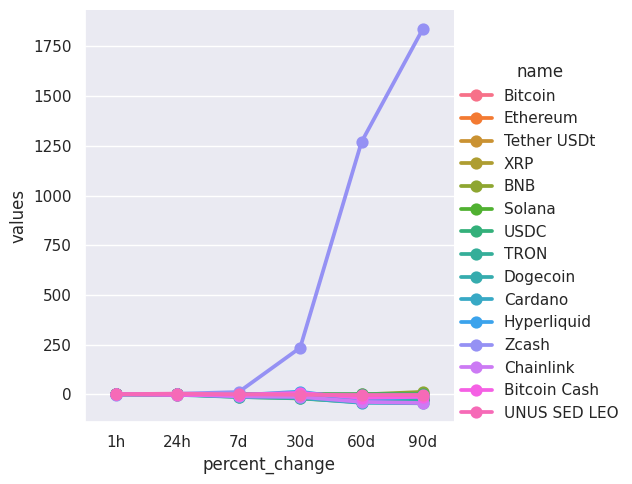

In [72]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [73]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10.head(20)

,name,quote.USD.price,Timestamp
0,Bitcoin,95378.42169,2025-11-16 14:39:53.797176
15,Bitcoin,95468.43666,2025-11-16 14:42:20.384071
30,Bitcoin,95468.43666,2025-11-16 14:43:03.903984


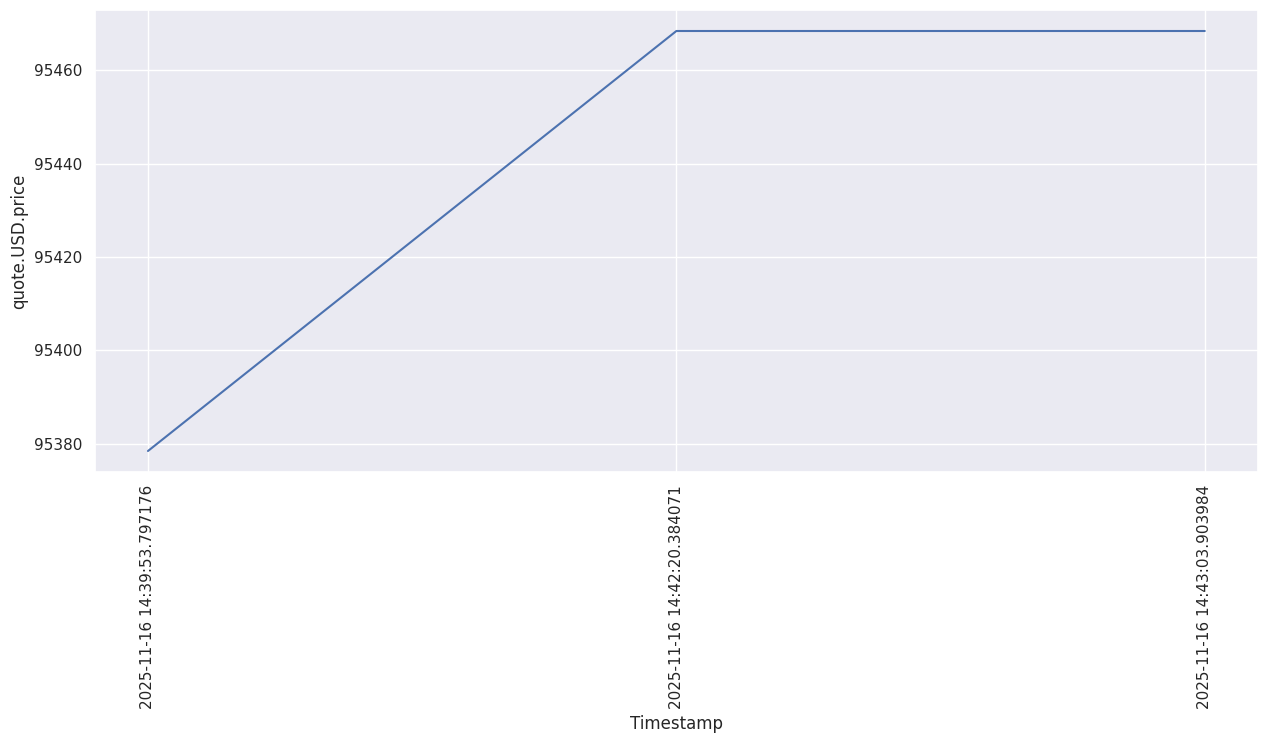

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# increase the plot width
plt.figure(figsize=(15, 6))

# 2. draw the seaborn plot
sns.set_theme(style="darkgrid")
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df10)

# 3. rotate 90 of x axis
plt.xticks(rotation=90)

# 4. show plot
plt.show()